In [1]:
import pandas as pd
from yaml import load
from yaml import CLoader as Loader
from sklearn.preprocessing import OneHotEncoder

In [2]:
#If you want to debug the package without repackaging, you can read files locally:
import sys
sys.path.insert(0, '/home/phyto/Abil/abil/')
from tune import tune
from functions import example_data, upsample

['temperature', 'si', 'phosphate', 'din', 'o2', 'mld', 'DIC', 'TA', 'irradiance', 'chlor_a', 'pic']
species observations >0
19


[0 0 0 ... 0 0 0]


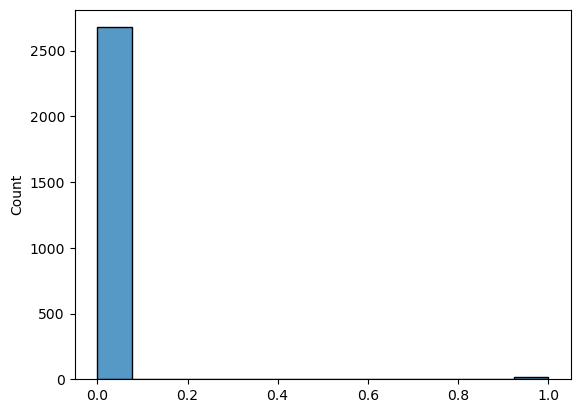

absence index
(array([   0,    1,    2, ..., 2693, 2694, 2695]),)
nix:
[   0    1    2 ... 2693 2694 2695]
pix:
[2078 2081 2150 2227 2298 2334 2336 2339 2341 2343 2346 2348 2351 2352
 2353 2354 2387 2392 2404]
len d:
209


In [8]:
# Setting up a regressor model
with open('/home/phyto/Abil/devries2024/2-phase.yml', 'r') as f:
    model_config = load(f, Loader=Loader)

predictors = model_config['predictors']
#read your target + environmental data:
d = pd.read_csv("/home/phyto/Abil/devries2024/data/obs_env.csv")
#species =  "Emiliania huxleyi"
species =  "Florisphaera profunda"
species = "Syracosphaera strigilis"

d[species] = d[species].fillna(0)
d = d.dropna(subset=[species])
print(predictors)
#d = d.dropna(subset=predictors)
print("species observations >0")
print(len(d[d[species]>0]))

#print("len d:")
#print(len(d))
d = upsample(d, species, ratio=10)
print("len d:")
print(len(d))